# RESUME CLASSIFICATION using MACHINE LEARNING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

from pandas.plotting import scatter_matrix
from matplotlib.gridspec import GridSpec

import re

import nltk
from nltk.corpus import stopwords
import string

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Datasets\Resume\UpdatedResumeDataSet.csv')
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


* **Some documents are considered bad data because they contain irrelevant special characters. These special characters are often introduced when the data is stored in a database and then retrieved from the database. When a resume is stored, it is typically correct and fine. However, when the resume is retrieved from the database, the special characters may be introduced, which can make the resume invalid.**


* **We first apply text pre-processing steps to clean the data then apply feature encoding techniques and in last we perform model building.**

In [3]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [4]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

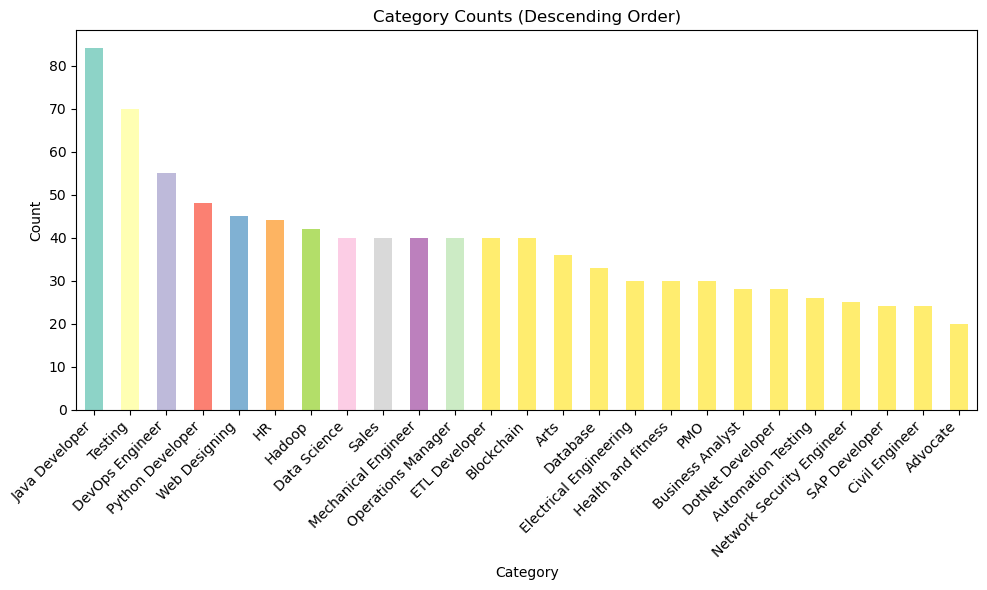

In [5]:
category_counts = df['Category'].value_counts()

# Sort the categories in descending order based on their counts
category_counts_sorted = category_counts.sort_values(ascending=False)

# Create a colorful bar plot with different colors for each category
plt.figure(figsize=(10, 6))
colors = plt.cm.Set3(range(len(category_counts_sorted)))
category_counts_sorted.plot(kind='bar', color=colors)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Counts (Descending Order)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

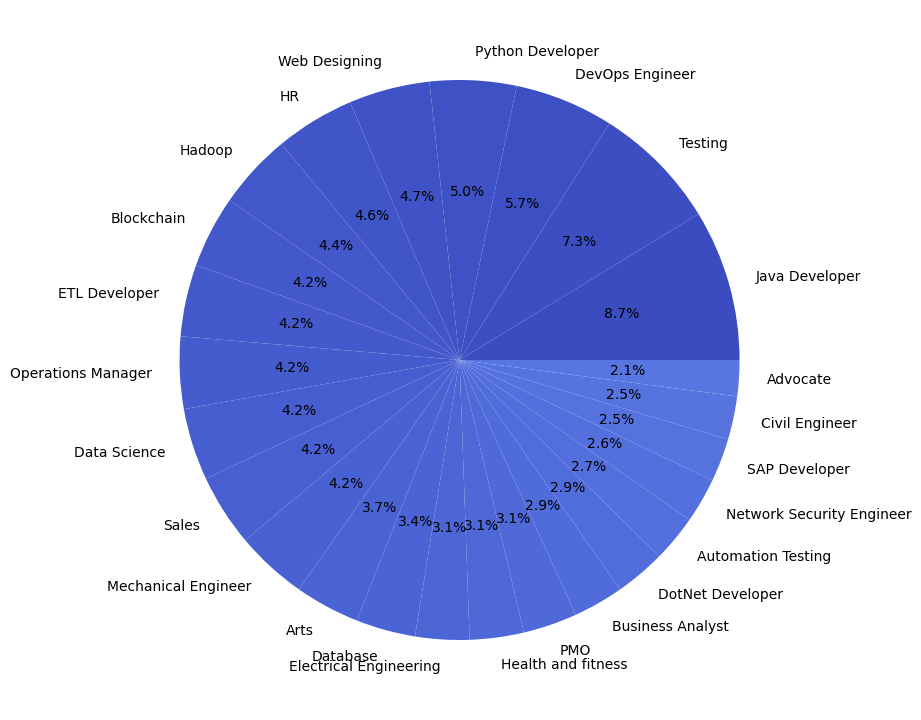

In [6]:
# Count occurrences of each category
targetCounts = df['Category'].value_counts()
targetLabels = targetCounts.index

# Create a colorful pie chart
plt.figure(1, figsize=(20, 20))
theGrid = GridSpec(2, 2)
cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in range(len(targetCounts))]

plt.subplot(theGrid[0, 1], aspect=1)
sourcePie = plt.pie(targetCounts, labels=targetLabels, colors=colors, autopct='%.1f%%')

plt.show()

# Data Cleaning / Text Pre-processing

## 1) Convert uppercase into lower case

In [7]:
df['Resume'] = df['Resume'].str.lower()
df['Resume']

0      skills * programming languages: python (pandas...
1      education details \r\nmay 2013 to may 2017 b.e...
2      areas of interest deep learning, control syste...
3      skills â¢ r â¢ python â¢ sap hana â¢ table...
4      education details \r\n mca   ymcaust,  faridab...
                             ...                        
957    computer skills: â¢ proficient in ms office (...
958    â willingness to accept the challenges. â ...
959    personal skills â¢ quick learner, â¢ eagerne...
960    computer skills & software knowledge ms-power ...
961    skill set os windows xp/7/8/8.1/10 database my...
Name: Resume, Length: 962, dtype: object

## 2) Remove URL's, Hastags, special characters, punctuation marks, blank spaces, newlines,non-ASCII Characters, Leading/trailing spaces.

In [8]:
def cleanResume(resumeText):
    
    resumeText = re.sub(r'http\S+', '', resumeText)  # Removing URLs starting with 'http' or 'https' with blank space
    resumeText = re.sub(r'RT|cc', '', resumeText)  # Removing 'RT' and 'cc' word / how to remove a particular word from corpus
    resumeText = re.sub(r'#\S+', '', resumeText) # Removing hastage and words connected with hastages untill space, such as '#WOW'.
    resumeText = re.sub(r'@\S+', '', resumeText) # Removing @ and words connected with hastages untill space. such as '@gmail.com'
    resumeText = re.sub(r'(?<=[A-Za-z])\*|(?<=[A-Za-z])\.(\s|$)|(?<=[A-Za-z])\'(\s|$)|[^\w\s,\'-*]', '', resumeText) # Removing all punctuation marks except (,) and (.)
    resumeText = re.sub(r'\s+', ' ', resumeText)   # Removing multiple spaces and newlines
    resumeText = re.sub(r'[^\x00-\x7F]+', '', resumeText) # Removing non-ASCII characters
    resumeText = resumeText.strip() # Removing leading/trailing spaces

    return resumeText

**ASCII characters means all characters have value by which they are stores in system, whether the character is symbol emoji, emoticons, digits etc.** 


**ASCII characters refer to all characters that have a corresponding numeric value by which they are stored in a computer system. These characters include symbols, emojis, emoticons, digits, punctuation marks, and other textual characters. Each ASCII character is represented by a specific number between 0 and 127 (for the standard ASCII character set).**

In [9]:
resumeText = "Hello, this résumé contains non-ASCII characters."
modifiedText = re.sub(r'[^\x00-\x7f]+', r'', resumeText)
print(modifiedText)

Hello, this rsum contains non-ASCII characters.


**é, é these are called non-ASCII characters.**

In [10]:
df['cleaned resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [11]:
# 30th record of dataset

print(df['cleaned resume'][30])

skills * programming languages python (pandas, numpy, scipy, scikitlearn, matplotlib), sql, java, javascriptjquery* machine learning regression, svm, nave bayes, knn, random forest, decision trees, boosting techniques, cluster analysis, word embedding, sentiment analysis, natural language processing, dimensionality reduction, topic modelling (lda, nmf), pca neural nets* database visualizations mysql, sqlserver, cassandra, hbase, elasticsearch d3js, dcjs, plotly, kibana, matplotlib, ggplot, tableau* others regular expression, html, css, angular 6, logstash, kafka, python flask, git, docker, computer vision open cv and understanding of deep learningeducation details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar (technology 

In [12]:
df.head()

,Category,Resume,cleaned resume
0,Data Science,skills * programming languages: python (pandas...,"skills * programming languages python (pandas,..."
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 to may 2017 be uitr...
2,Data Science,"areas of interest deep learning, control syste...","areas of interest deep learning, control syste..."
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana...
4,Data Science,"education details \r\n mca ymcaust, faridab...","education details mca ymcaust, faridabad, hary..."


**All the steps of text preprocessing is applied on corpus which we give in the user define function.**

In [13]:
# Check the no. of documents in dataset and maximum length of document 

sentLens = []

for i in df['cleaned resume']:
    length = len(i.split())
    sentLens.append(length)

print(len(sentLens))
print(max(sentLens))

962
1991


In [14]:
# Original Resume 

df['Resume'][100]

'skills: natural languages: proficient in english, hindi and marathi. computer skills: proficient with ms-office, internet operation.education details \r\njanuary 2015 to january 2018 llb law mumbai, maharashtra mumbai university\r\njanuary 2015 b.m.m  mumbai, maharashtra s.k.somaiya college, mumbai university\r\n h.s.c   asmita girls junior college, maharashtra board\r\n s.s.c vidya bhawan  maharashtra board\r\nadvocate \r\n\r\nllb student and journalist\r\nskill details \r\ncompany details \r\ncompany - criminal lawyer (law firm)\r\ndescription - '

In [15]:
# Cleaned Resume 

df['cleaned resume'][100]

'skills natural languages proficient in english, hindi and marathicomputer skills proficient with msoffice, internet operationeducation details january 2015 to january 2018 llb law mumbai, maharashtra mumbai university january 2015 bmm mumbai, maharashtra sksomaiya college, mumbai university hsc asmita girls junior college, maharashtra board ssc vidya bhawan maharashtra board advocate llb student and journalist skill details company details company criminal lawyer (law firm) description'

# 3) Tokenization, removal of Stop words and punctuation marks

In [16]:
setOFStopWords = set(stopwords.words('english'))
setOFStopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

**List of stop words.**

In [17]:
totalWords = []
setOfStopwords = set(stopwords.words('english'))

sentences = df['cleaned resume'].values
cleanedSent = ' '

for i in range(1, 160):
    cleanedText = cleanResume(sentences[i])
    cleanedSent += cleanedText

    requiredWords = nltk.word_tokenize(cleanedText)

    for word in requiredWords:
        if word not in setOfStopwords and word not in string.punctuation:
            totalWords.append(word)

wordFreqDist = nltk.FreqDist(totalWords)
mostCommon = wordFreqDist.most_common(50)
print(mostCommon)

[('details', 485), ('exprience', 443), ('data', 398), ('months', 392), ('company', 387), ('description', 357), ('1', 290), ('year', 244), ('project', 222), ('january', 216), ('learning', 205), ('less', 204), ('science', 201), ('skill', 183), ('maharashtra', 166), ('6', 159), ('machine', 155), ('python', 154), ('college', 140), ('university', 140), ('web', 134), ('development', 133), ('skills', 127), ('like', 126), ('arts', 126), ('education', 122), ('india', 120), ('management', 120), ('application', 120), ('team', 109), ('using', 109), ('business', 108), ('software', 108), ('analytics', 106), ('monthscompany', 101), ('developed', 99), ('used', 97), ('mumbai', 96), ('knowledge', 94), ('projects', 93), ('sql', 91), ('time', 90), ('engineering', 90), ('experience', 90), ('database', 87), ('pune', 86), ('responsibilities', 84), ('analysis', 81), ('technical', 80), ('technologies', 80)]


**Analyse most occurring words that all are related to data. Check for suspicious words. If you find any word which is not helpful in solving task them remove that word. E.g.: In above vocabulary pune, mumbai words are there, so if we want then we can remove it becuase these words not help the model to classify resume.**

**These are most occurring words in 'cleand resume' column.**

**In this code we first apply sentence tokenization, then word tokenization, then remove the punctuation marks, remove stop words and check the frequence of most occuring 50 words.**

# 4) Word cloud of most occurring words

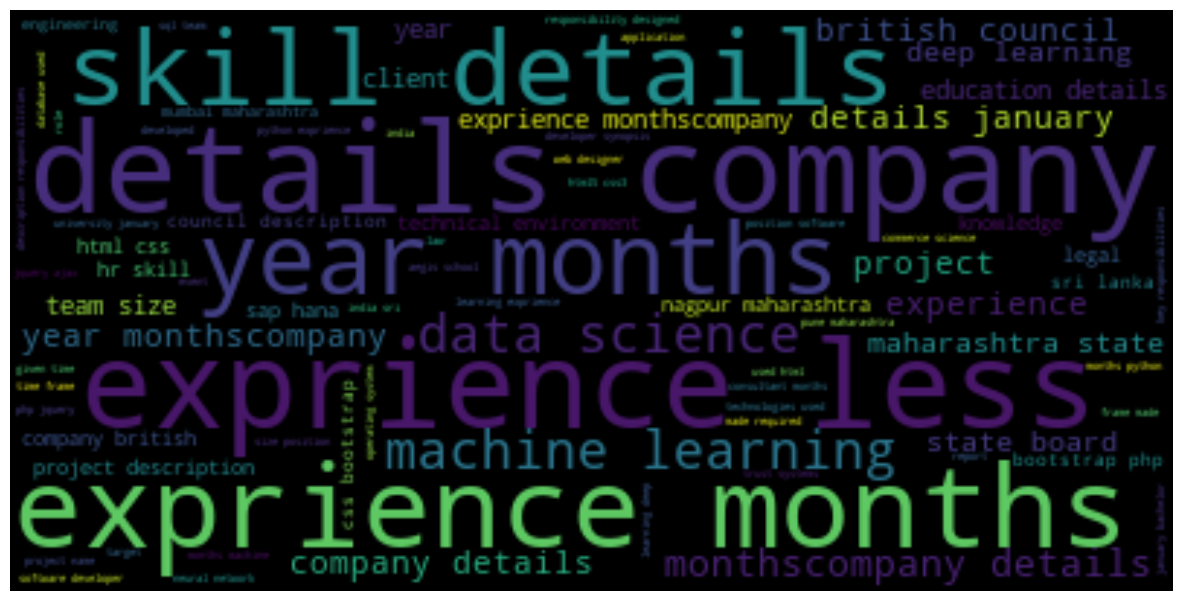

In [18]:
wc = WordCloud().generate(cleanedSent)

plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

**Data is cleaned now.**

## Add labels of target variables

In [19]:
lenc = LabelEncoder()

df['Category_Labelled'] = lenc.fit_transform(df['Category'])

In [20]:
df.head()

,Category,Resume,cleaned resume,Category_Labelled
0,Data Science,skills * programming languages: python (pandas...,"skills * programming languages python (pandas,...",6
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 to may 2017 be uitr...,6
2,Data Science,"areas of interest deep learning, control syste...","areas of interest deep learning, control syste...",6
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana...,6
4,Data Science,"education details \r\n mca ymcaust, faridab...","education details mca ymcaust, faridabad, hary...",6


## Store data of columns in a variable

In [21]:
text = df['cleaned resume'].values
op_labels = df['Category_Labelled'].values

In [22]:
df['cleaned resume'].values

array(['skills * programming languages python (pandas, numpy, scipy, scikitlearn, matplotlib), sql, java, javascriptjquery* machine learning regression, svm, nave bayes, knn, random forest, decision trees, boosting techniques, cluster analysis, word embedding, sentiment analysis, natural language processing, dimensionality reduction, topic modelling (lda, nmf), pca neural nets* database visualizations mysql, sqlserver, cassandra, hbase, elasticsearch d3js, dcjs, plotly, kibana, matplotlib, ggplot, tableau* others regular expression, html, css, angular 6, logstash, kafka, python flask, git, docker, computer vision open cv and understanding of deep learningeducation details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar (tec

In [23]:
df['Category_Labelled'].values

array([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 22

# 5) Appy TF-IDF Vectorizer

In [24]:
wordVectorizer = TfidfVectorizer(max_features=1500)
wordVectorizer.fit(text)
features = wordVectorizer.transform(text)

In [25]:
wordVectorizer.get_feature_names()

['01',
 '10',
 '11',
 '11g',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '19',
 '20',
 '2000',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '23',
 '24',
 '26',
 '27',
 '28',
 '2nd',
 '30',
 '31',
 '36',
 '39',
 '3d',
 '45',
 '48',
 '50',
 '60',
 '72',
 '85',
 '91',
 '96',
 'ability',
 'able',
 'about',
 'above',
 'academic',
 'academy',
 'achieve',
 'achieved',
 'achievements',
 'achieving',
 'across',
 'act',
 'action',
 'actions',
 'active',
 'actively',
 'activities',
 'activity',
 'actual',
 'ad',
 'adding',
 'address',
 'adherence',
 'admin',
 'administration',
 'administrative',
 'administrator',
 'advance',
 'advanced',
 'aenture',
 'aeptance',
 'aess',
 'after',
 'against',
 'agile',
 'agreed',
 'aim',
 'air',
 'ajax',
 'algorithms',
 'all',
 'allow',
 'along',
 'also',
 'am',
 'among',
 'amravati',
 'an',
 'analysis',
 'analyst',
 'analysts',
 'analytical',
 'analytics',
 'analyze',
 'analyzed',
 

# 6) Train Test Split and Model Building

In [26]:
xTrain, xTest, yTrain, yTest = train_test_split(features, op_labels, test_size=0.25)

In [27]:
xTrain.shape, yTrain.shape, xTest.shape, yTest.shape

((721, 1500), (721,), (241, 1500), (241,))

## (i) Multimomial Naive Bayes 

In [28]:
mnb = MultinomialNB()

mnb.fit(xTrain, yTrain)

MultinomialNB()

**For NLP tasks Multinomial Naive Bayes is used and for classification tasks in ML Gaussian Naive Bayes is used.**

In [29]:
mnb.score(xTrain, yTrain)

0.9431345353675451

**Accuracy os training data is 93%**

In [30]:
predicted = mnb.predict(xTest)

In [31]:
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.88      1.00      0.93         7
           2       1.00      0.67      0.80         6
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         8
           5       1.00      0.62      0.77         8
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         5
           8       1.00      0.94      0.97        16
           9       1.00      0.29      0.44         7
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      0.89      0.94         9
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00         6
          15       0.61      1.00      0.76        22
          16       1.00      1.00      1.00        11
          17       1.00    

* **This is classification report of each category of target variable in test data.**


* **Accuracy of Test Data is 87% and model is not overfitted.**


* **The precision of each category is good, but the recall of some categories is not good. Therefore, we will work on those categories to increase their recall and try to increase the accuracy of the model. This is not a mandatory step, but doing so will likely increase the accuracy of the model.**


* **Precision or recall less than 0.50 is not consider as good.**


* **If the client inquires about instances where the model's accuracy falls short of expectations, it's important to tell that the model struggles to accurately predict certain specific categories.**


* **To improve the precision, recall, and accuracy of the model, we can increase the amount of data for the categories that are not predicted well by the model. This will help the model to learn more about these categories and to make better predictions for them.**


* **By looking at the classification report, you can see which categories the model is having trouble with. You can then remove those categories from the model and rebuild it. This will likely improve the accuracy of the model.**

**Multinomial Naive Bayes is not performing well and is not giving the desired results. Let's try and test other machine learning classification algorithms.**

## (ii) Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xTrain, yTrain)

LogisticRegression()

In [33]:
lr.score(xTrain, yTrain)

0.9972260748959778

In [34]:
predicted = lr.predict(xTest)
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         5
           8       1.00      0.94      0.97        16
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        11
          17       1.00    

**Training accuracy is 99% and test accuracy is also 99%, this means model doesn't overfir and perform well.**

## (iii) Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [36]:
dt.score(xTrain, yTrain)

1.0

In [37]:
predicted = dt.predict(xTest)
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.78      1.00      0.88         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        11
          17       1.00    

## (iv) Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(xTrain, yTrain)

RandomForestClassifier()

In [39]:
rf.score(xTrain, yTrain)

1.0

In [40]:
predicted = rf.predict(xTest)
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        11
          17       1.00    

## (V) SVC 

In [41]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(xTrain, yTrain)

LinearSVC()

In [42]:
linear_svc.score(xTrain, yTrain)

1.0

In [43]:
predicted = linear_svc.predict(xTest)
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         5
           8       1.00      0.94      0.97        16
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        11
          17       1.00    

## (VI) Stochastic Gradient Descent Classifier / SGD Classifier

In [44]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(xTrain, yTrain)

SGDClassifier()

In [45]:
sgd.score(xTrain, yTrain)

1.0

In [46]:
predicted = sgd.predict(xTest)
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         5
           8       1.00      0.94      0.97        16
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        11
          17       1.00    

## (VII) KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(xTrain, yTrain)

KNeighborsClassifier()

In [48]:
knn.score(xTrain, yTrain)

0.9833564493758669

In [49]:
predicted = knn.predict(xTest)
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       0.83      0.71      0.77         7
           7       1.00      1.00      1.00         5
           8       1.00      0.94      0.97        16
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      0.78      0.88         9
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        11
          17       1.00    

## (VIII) Voting Classifier

In [50]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[
    ("lr", lr), 
    ('dt', dt),
    ("knn", knn),
    ('sgd', sgd),
    ('mnb', mnb),
    ('rf', rf),
    ('linear_svc', linear_svc)
], voting='hard')

voting.fit(xTrain, yTrain)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('sgd', SGDClassifier()), ('mnb', MultinomialNB()),
                             ('rf', RandomForestClassifier()),
                             ('linear_svc', LinearSVC())])

In [51]:
voting.score(xTrain, yTrain)

1.0

In [52]:
predicted = voting.predict(xTest)
print(metrics.classification_report(yTest, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         5
           8       1.00      0.94      0.97        16
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        11
          17       1.00    

In [53]:
for clf in ([mnb, linear_svc, lr, knn, sgd, dt, rf, voting]):
    clf.fit(xTrain, yTrain)
    yPred = clf.predict(xTest)
    accuracy = accuracy_score(yTest, yPred)
    print(clf.__class__.__name__, accuracy)

MultinomialNB 0.91701244813278
LinearSVC 0.995850622406639
LogisticRegression 0.995850622406639
KNeighborsClassifier 0.975103734439834
SGDClassifier 1.0
DecisionTreeClassifier 0.991701244813278
RandomForestClassifier 1.0
VotingClassifier 0.995850622406639
